> #  Time series forecasting and portfolio optimization

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

tsla = yf.download('TSLA', start='2015-01-01', end='2024-10-31')
bnd = yf.download('BND', start='2015-01-01', end='2024-10-31')
spy = yf.download('SPY', start='2015-01-01', end='2024-10-31')

all_data = {
    'tesla':tsla,
    'bond':bnd,
    'spy':spy
}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


>>> ### Correct date format

In [2]:
from scripts.date_correction import *
for keys,data in all_data.items():
    data = format_date(data) 

In [3]:
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


>>> ### Check missing values

In [4]:
for items,keys in all_data.items():
    print(f'{items} missing values\n{keys.isna().sum()}\n')

tesla missing values
Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

bond missing values
Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
dtype: int64

spy missing values
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64



>>> ### Check Data Types

In [5]:
for items,keys in all_data.items():
    print(keys.dtypes)

Price      Ticker
Adj Close  TSLA      float64
Close      TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Open       TSLA      float64
Volume     TSLA        int64
dtype: object
Price      Ticker
Adj Close  BND       float64
Close      BND       float64
High       BND       float64
Low        BND       float64
Open       BND       float64
Volume     BND         int64
dtype: object
Price      Ticker
Adj Close  SPY       float64
Close      SPY       float64
High       SPY       float64
Low        SPY       float64
Open       SPY       float64
Volume     SPY         int64
dtype: object


>> ## Adjusted Close Prices

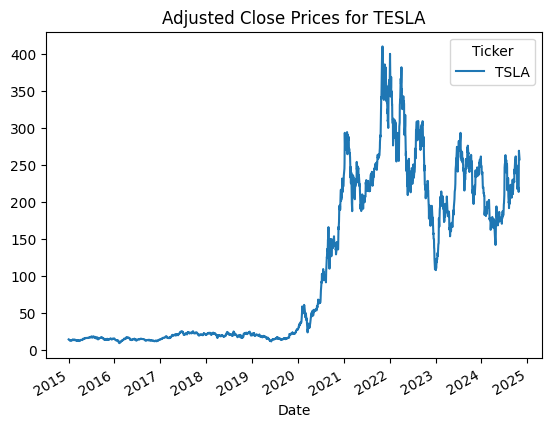

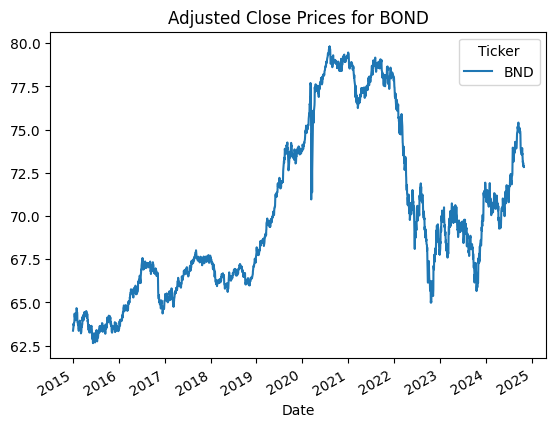

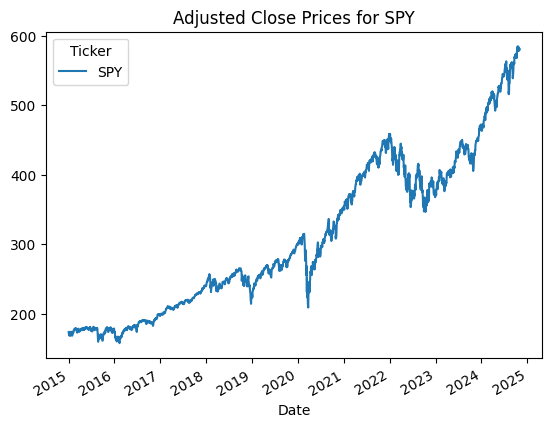

In [6]:
for asset, data in all_data.items():
    data['Adj Close'].plot(title=f"Adjusted Close Prices for {asset.upper()}")
    plt.show()

>> ## Daily Returns

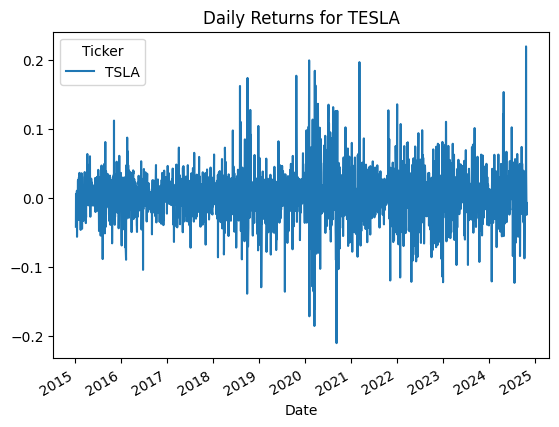

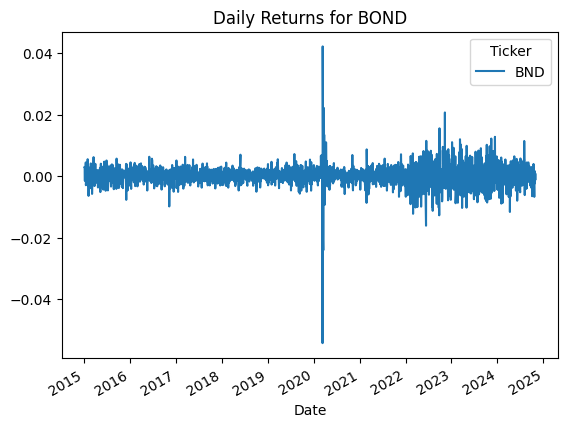

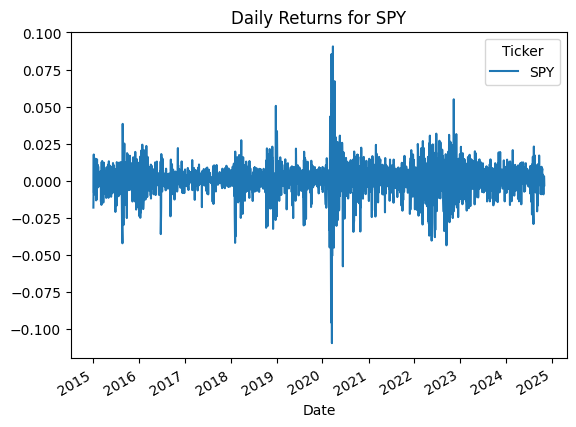

In [7]:
# Plot Daily Returns for all assets
for asset, data in all_data.items():
    returns = data['Adj Close'].pct_change().dropna()
    returns.plot(title=f"Daily Returns for {asset.upper()}")
    plt.show()

>> ## Volatility with shaded volatility range

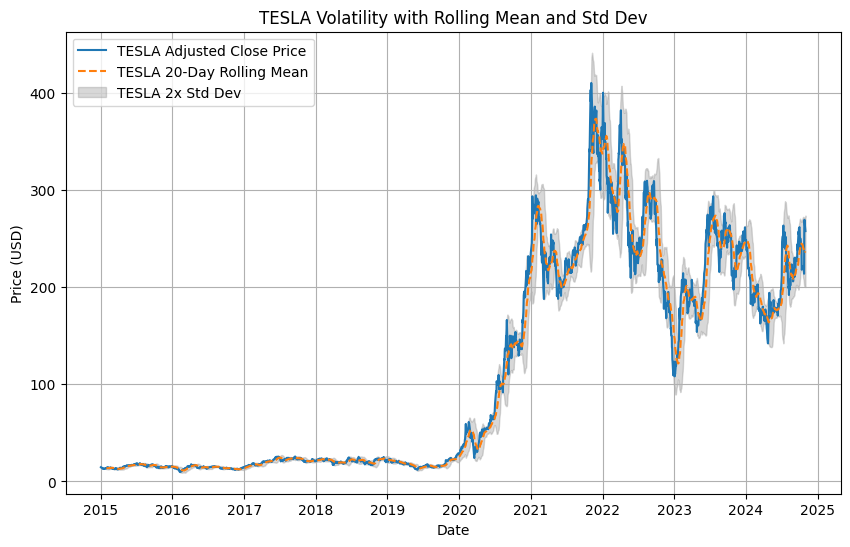

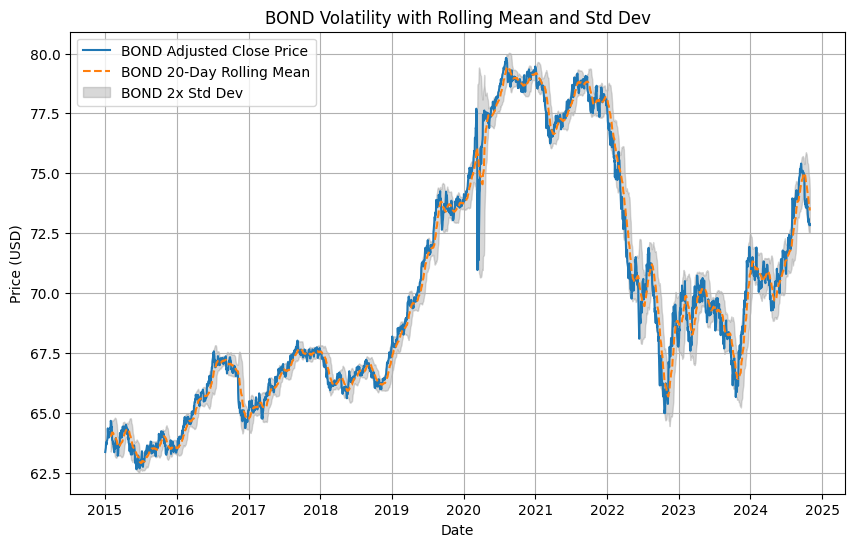

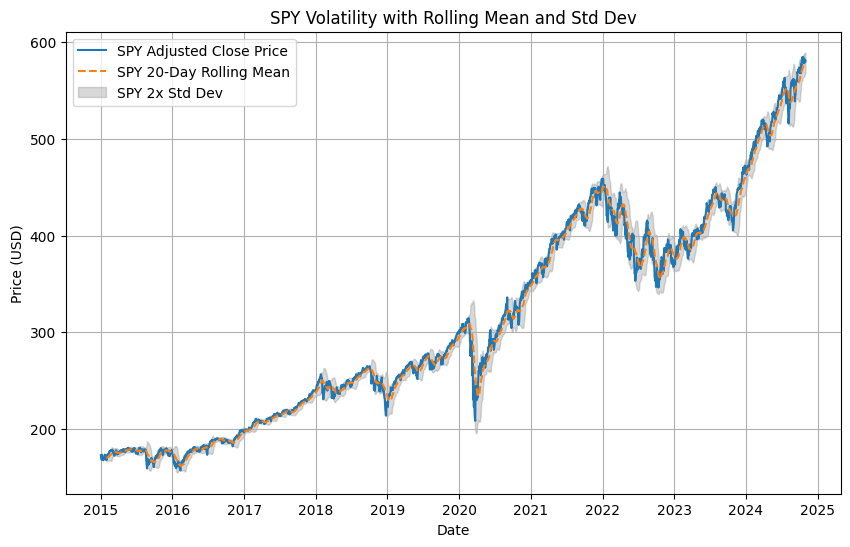

In [8]:
from scripts.visualizations import *
volatility(all_data)

>> ## Outliers

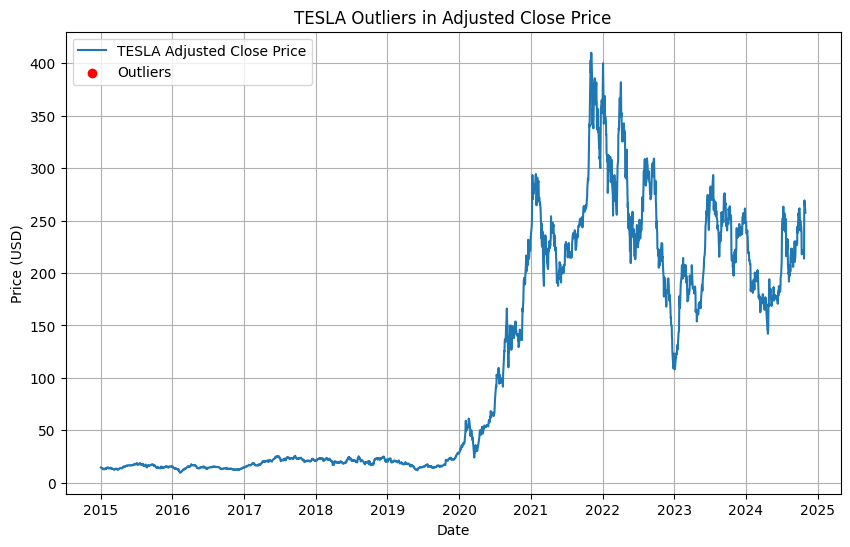

Outliers for TESLA:
Empty DataFrame
Columns: [(Adj Close, TSLA), (Z-Score, )]
Index: []




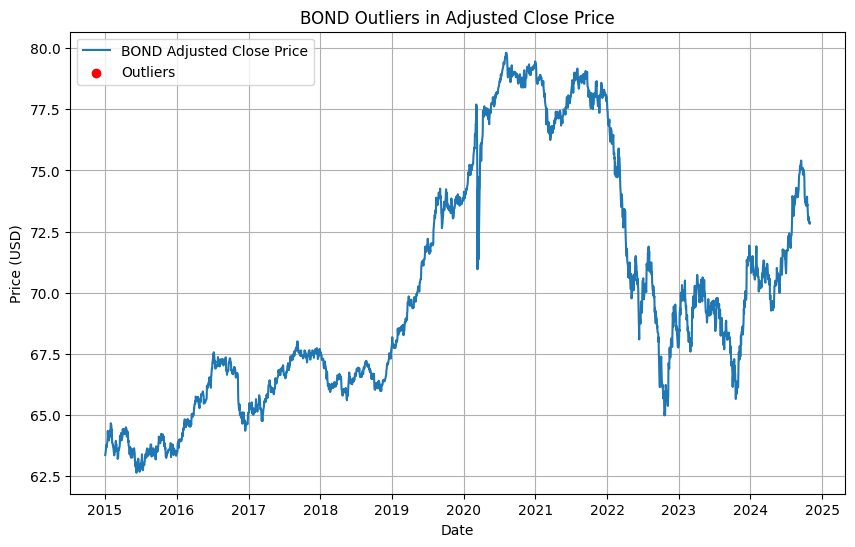

Outliers for BOND:
Empty DataFrame
Columns: [(Adj Close, BND), (Z-Score, )]
Index: []




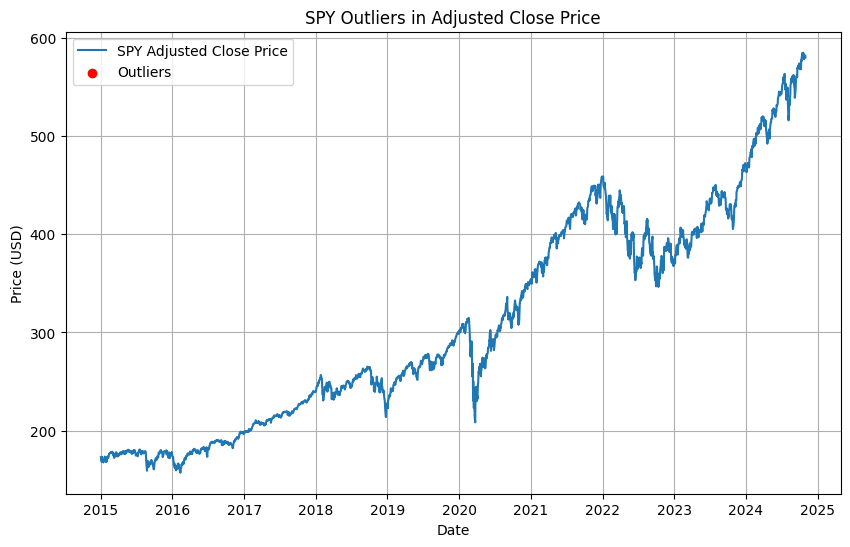

Outliers for SPY:
Empty DataFrame
Columns: [(Adj Close, SPY), (Z-Score, )]
Index: []




In [9]:
detect_outliers(all_data)   

>> ## Unusual High and Low Returns

>>> ### Calculate Daily returns

In [10]:
from scripts.features import *
calc_daily_return(all_data)

2024-11-11 08:25:32.310704: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:25:32.572010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:25:32.840655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731302733.047523    4407 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731302733.095038    4407 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 08:25:33.575154: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

>>> ### Daily Percentage Change

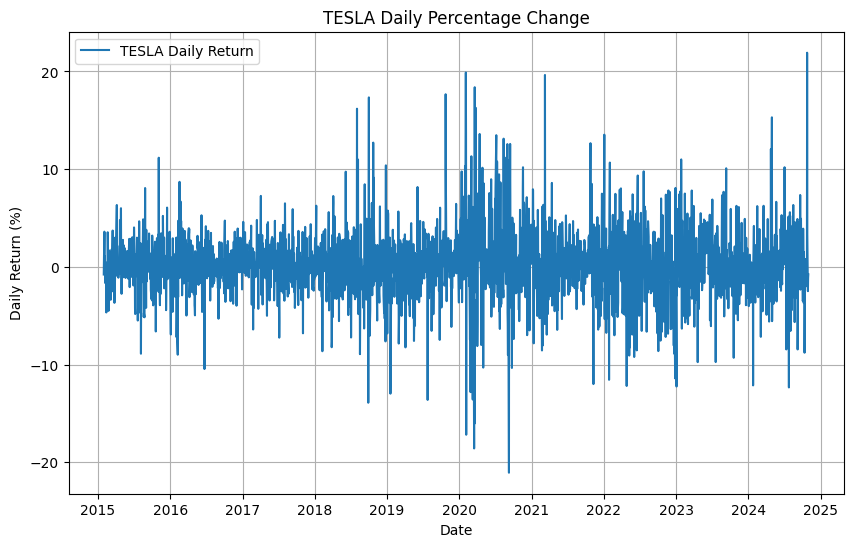

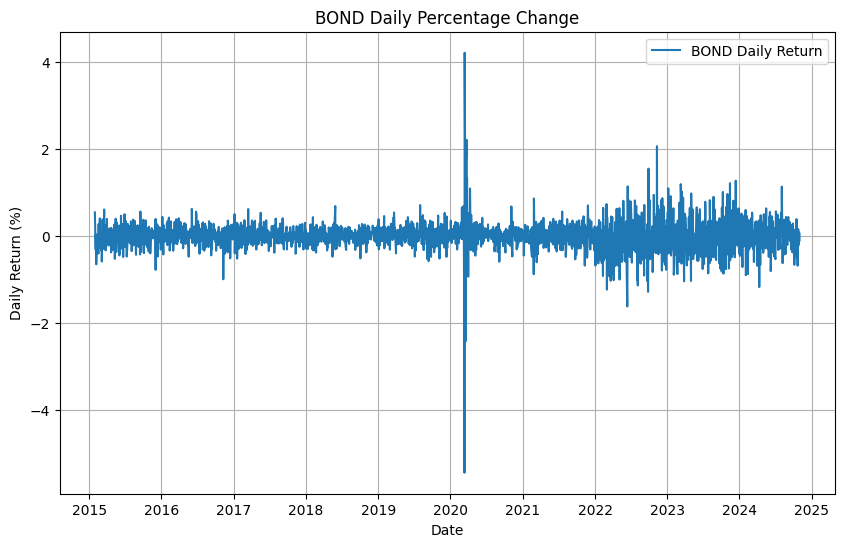

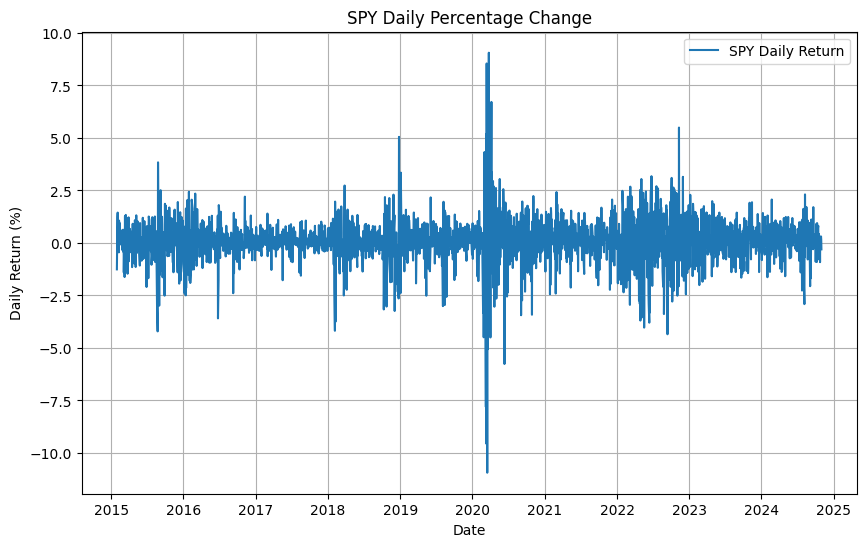

In [11]:
plot_daily_percentage(all_data)

>> ## Unusual High/Low Returns

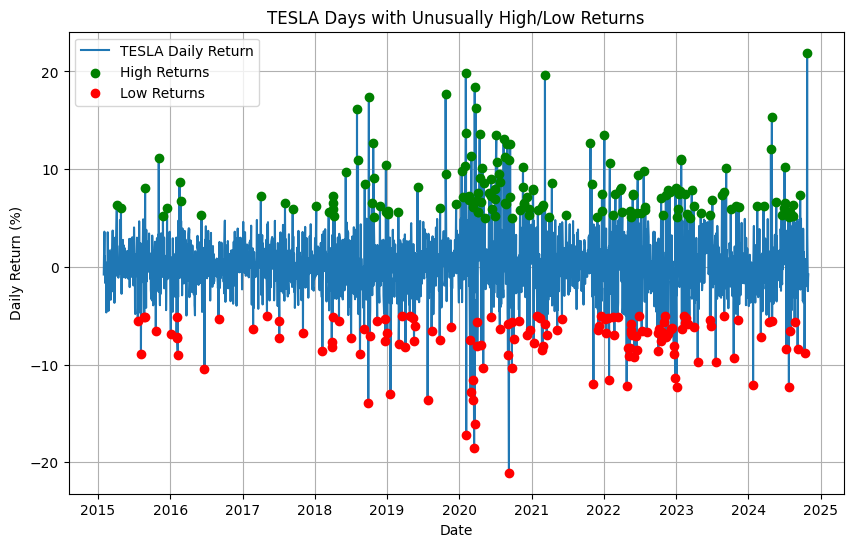

High Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-04-06 00:00:00+00:00     6.335084
2015-04-27 00:00:00+00:00     6.006504
2015-08-27 00:00:00+00:00     8.072407
2015-11-04 00:00:00+00:00    11.173506
2015-11-25 00:00:00+00:00     5.218781
...                                ...
2024-07-29 00:00:00+00:00     5.595998
2024-08-13 00:00:00+00:00     5.235706
2024-08-15 00:00:00+00:00     6.336277
2024-09-19 00:00:00+00:00     7.359156
2024-10-24 00:00:00+00:00    21.919035

[159 rows x 1 columns]


Low Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-07-21 00:00:00+00:00    -5.487851
2015-08-06 00:00:00+00:00    -8.884613
2015-08-20 00:00:00+00:00    -5.120475
2015-08-24 00:00:00+00:00    -5.156654
2015-10-20 00:00:00+00:00    -6.606755
...                                ...
2024-07-24 00:00:00+00:00   -1

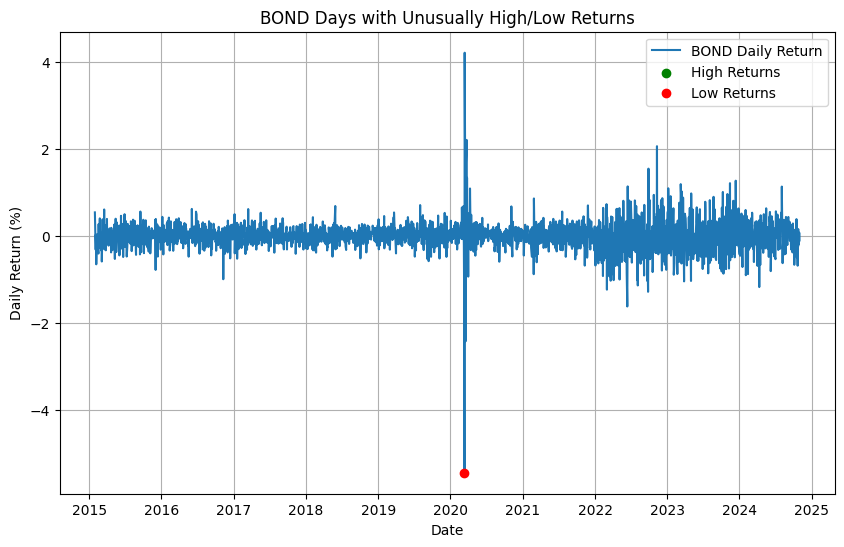

High Returns for BOND:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


Low Returns for BOND:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-12 00:00:00+00:00    -5.438449




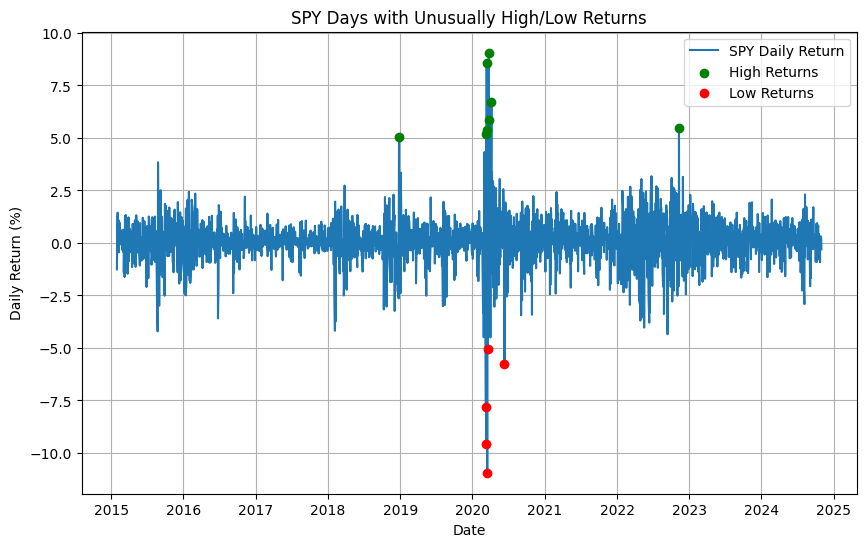

High Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2018-12-26 00:00:00+00:00     5.052504
2020-03-10 00:00:00+00:00     5.174472
2020-03-13 00:00:00+00:00     8.548625
2020-03-17 00:00:00+00:00     5.399204
2020-03-24 00:00:00+00:00     9.060329
2020-03-26 00:00:00+00:00     5.838988
2020-04-06 00:00:00+00:00     6.716625
2022-11-10 00:00:00+00:00     5.495413


Low Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-09 00:00:00+00:00    -7.809432
2020-03-12 00:00:00+00:00    -9.567718
2020-03-16 00:00:00+00:00   -10.942365
2020-03-18 00:00:00+00:00    -5.063298
2020-06-11 00:00:00+00:00    -5.764879




In [12]:
plot_significant_anomalies(all_data)

>> ## Seasonality and Trends

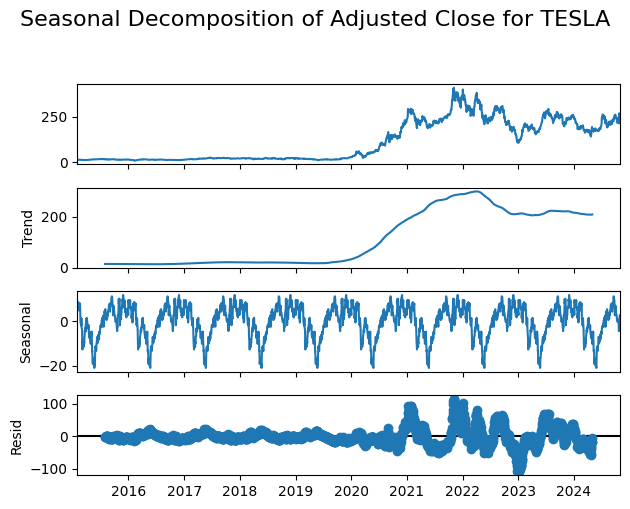

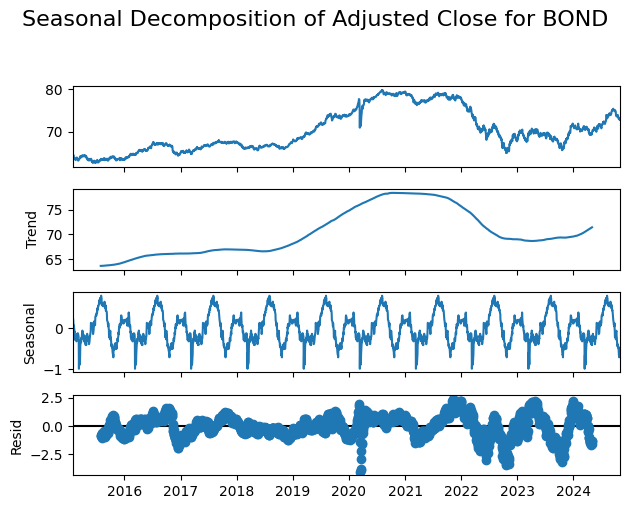

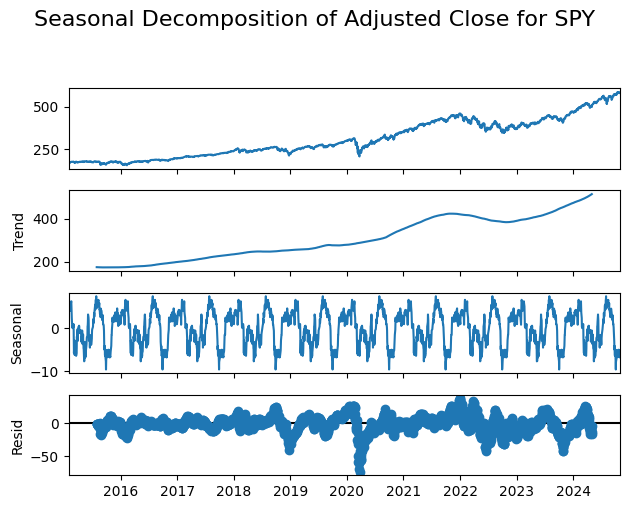

In [13]:
decomposition(all_data)

>> ## Volatility with separate lines for Adjusted Close, Rolling Mean, and Rolling Std Dev

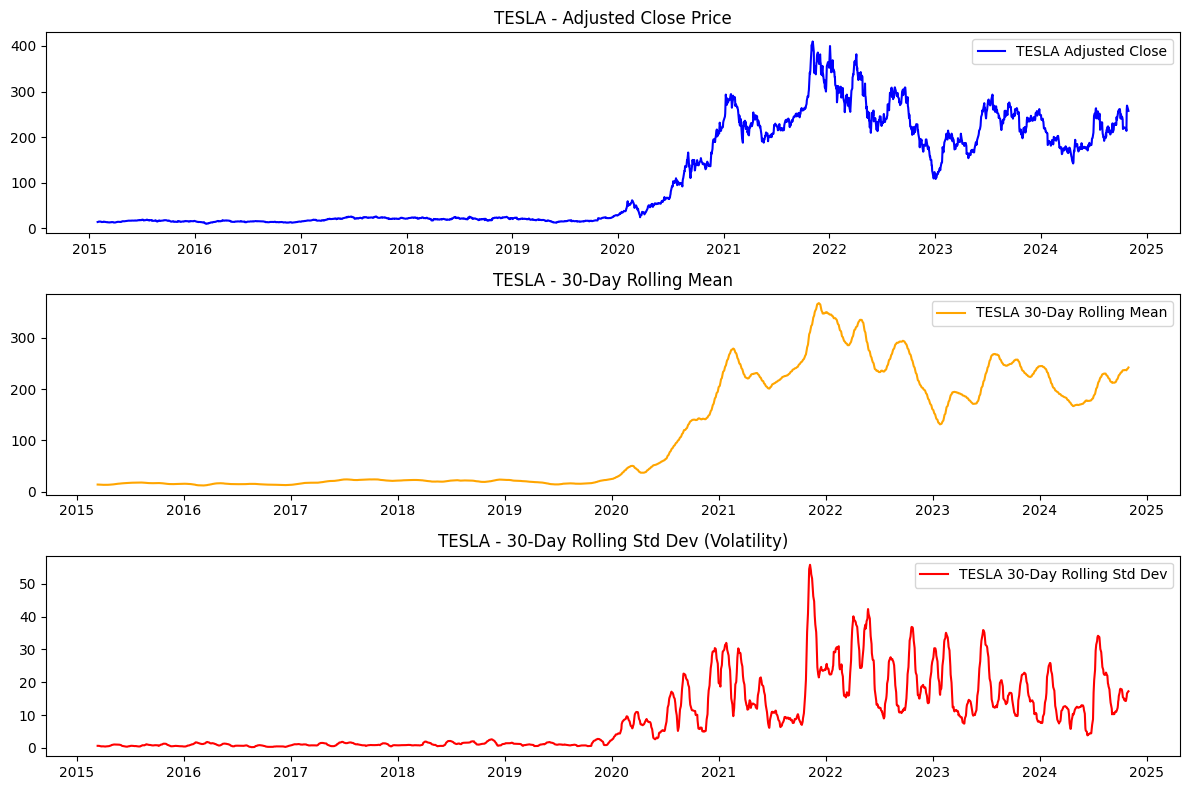

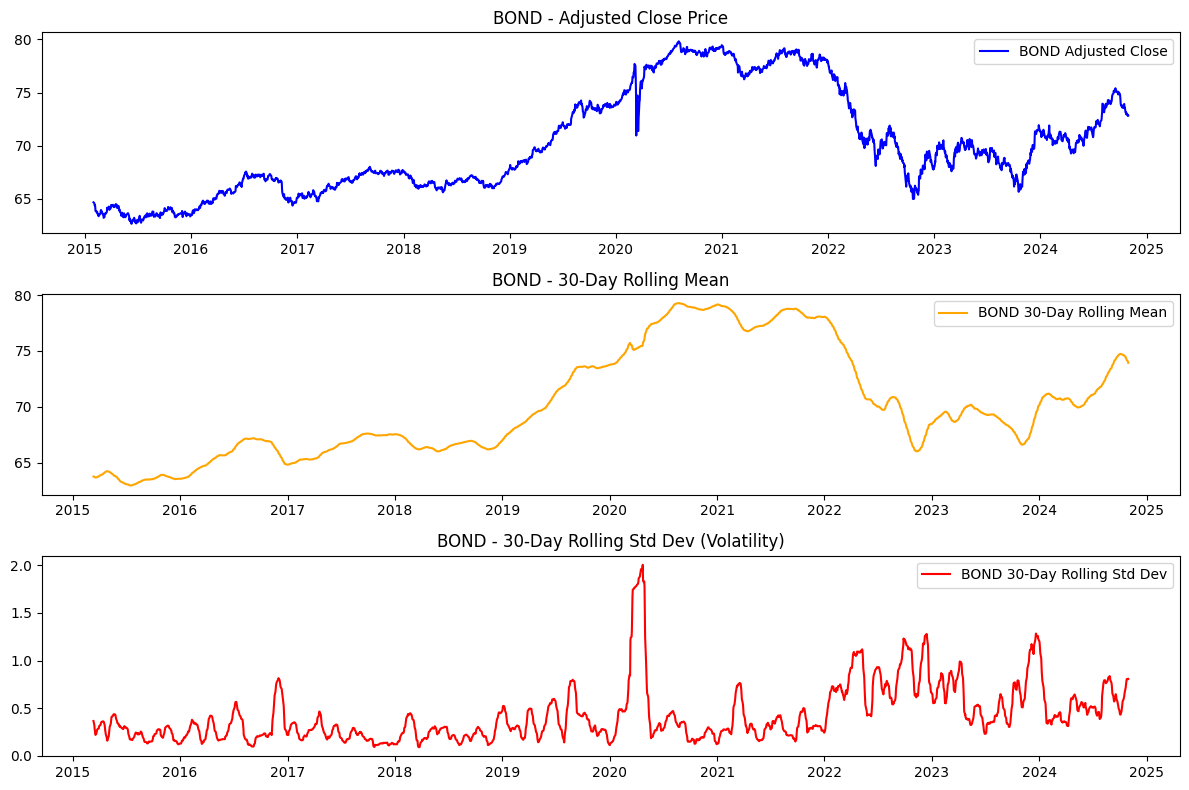

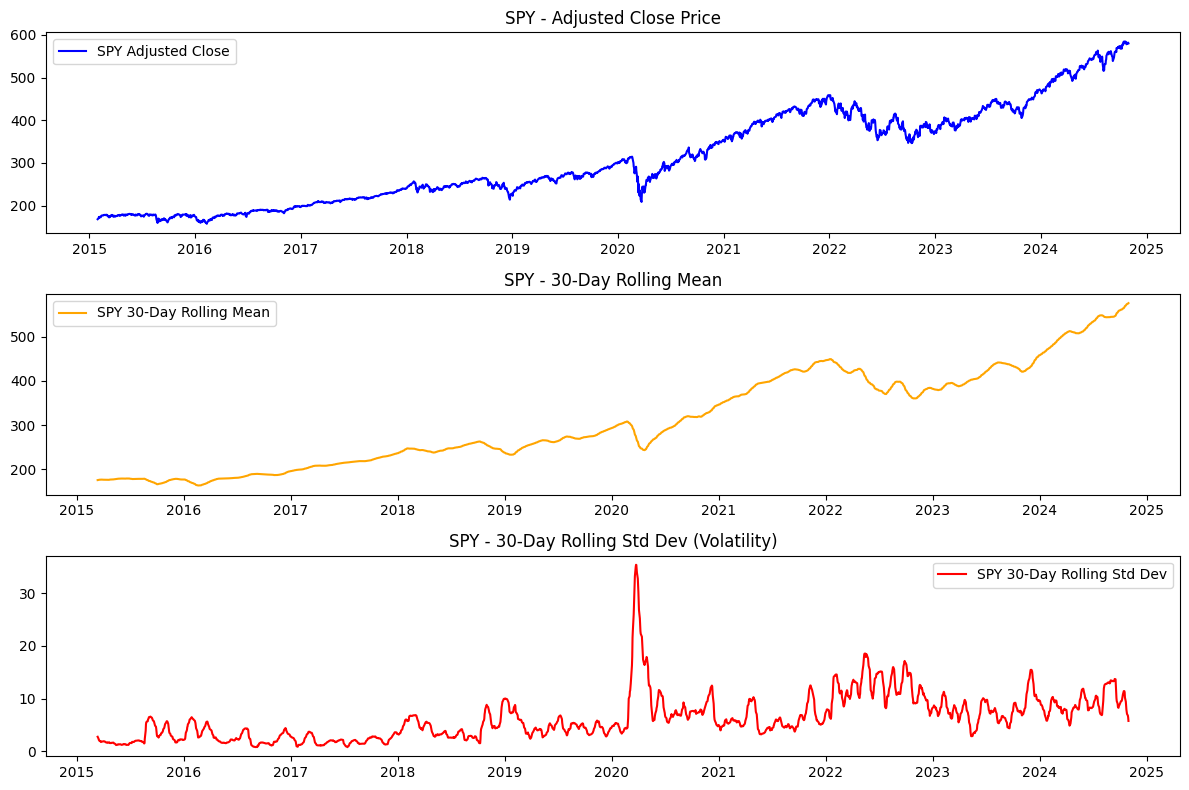

In [14]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

volatility_rolling(window_size,all_data)


>> ## Value At Risk

In [15]:
VaR_values = {}
for asset, data in all_data.items():
    VaR_value = VAR(asset, data)
    if VaR_value is not None: 
        VaR_values[asset] = VaR_value

tesla - 5% Value at Risk (95% confidence): -5.1251
bond - 5% Value at Risk (95% confidence): -0.4801
spy - 5% Value at Risk (95% confidence): -1.6761


In [16]:
print(VaR_values['tesla'])

-5.125142382150489


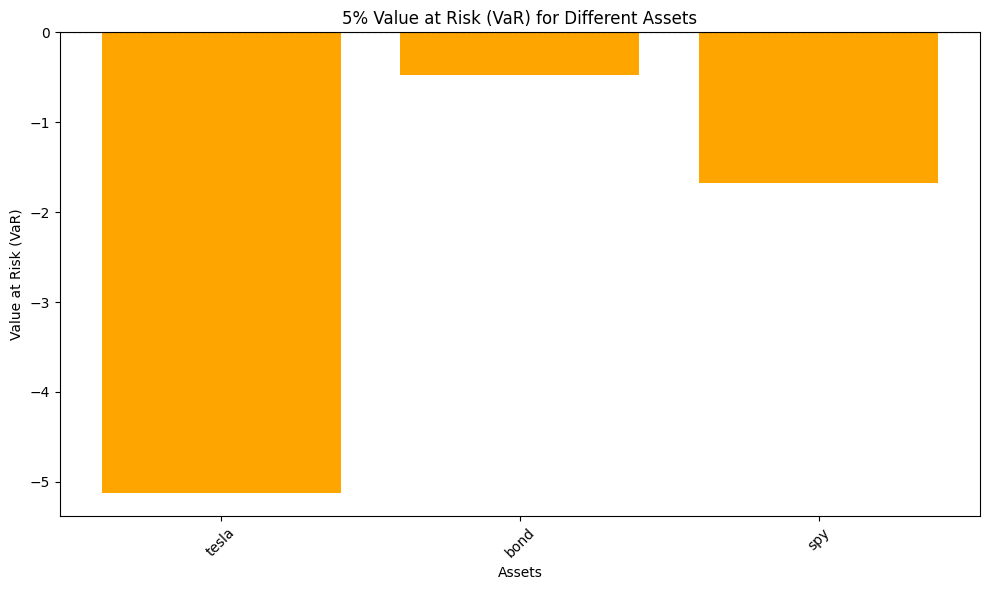

In [17]:
VAR_plot(VaR_values)

>> ## Sharpe Ratio

In [18]:
sharpe_values = {}
for asset, data in all_data.items():
    sharpe_value = Sharpe(asset, data)
    sharpe_values[asset] = sharpe_value

tesla Sharpe Ratio: 0.0512
bond Sharpe Ratio: 0.0162
spy Sharpe Ratio: 0.0504


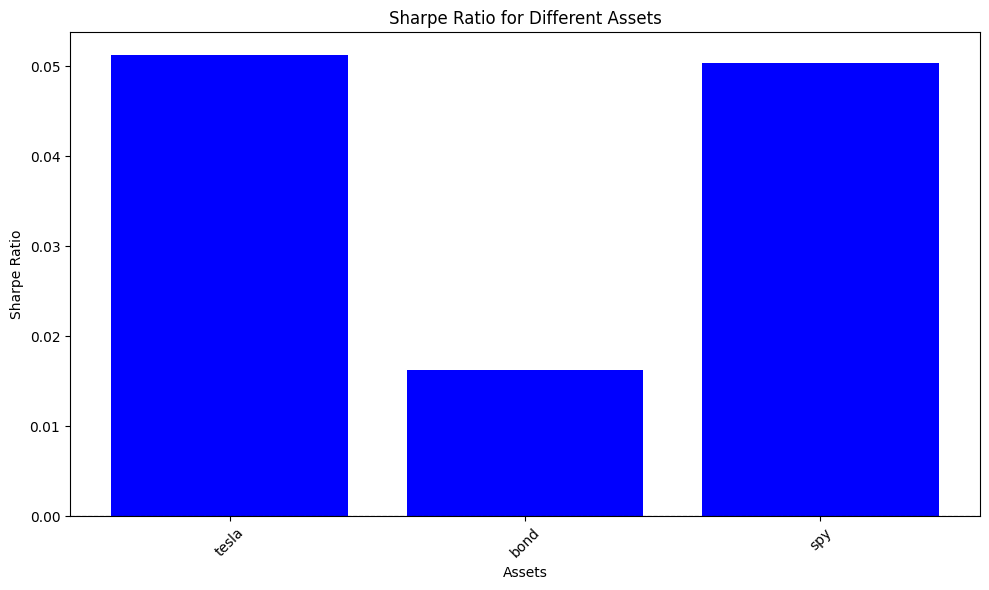

In [19]:
sharpe_plot(sharpe_values)

> # Develop Time Series Forecasting Models

Running forecasting for Tesla (TSLA)...


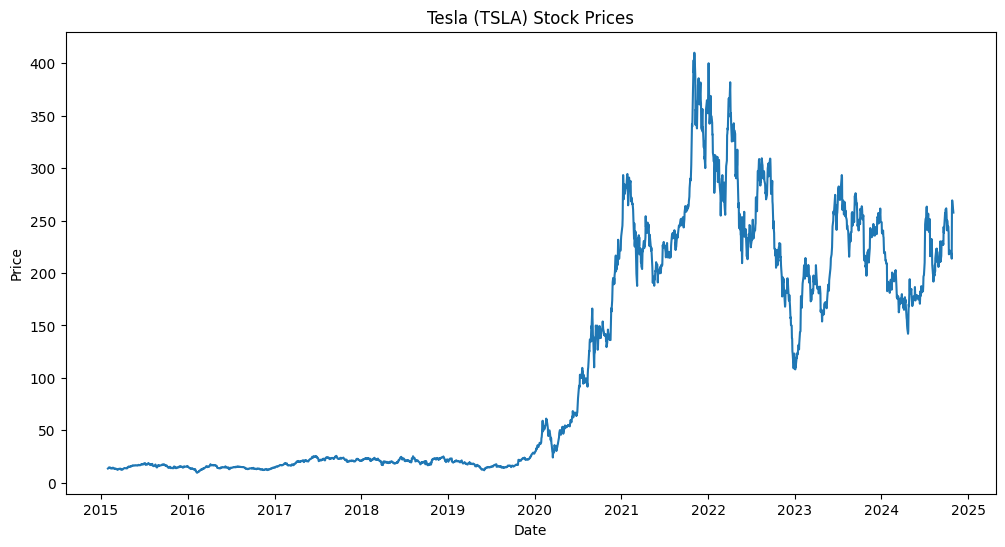

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18646D+00    |proj g|=  8.09079D-02

At iterate    5    f=  3.12896D+00    |proj g|=  2.23771D-02

At iterate   10    f=  3.11931D+00    |proj g|=  2.64041D-03

At iterate   15    f=  3.11879D+00    |proj g|=  8.75777D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   4.978D-06   3.119D+00
  F =   3.1187913239074985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Epoch 1/

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
2024-11-11 08:25:50.684576: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shap

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0296
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.8118e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.8311e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.5951e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.3667e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.2838e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.2726e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.4458e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.4151e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Tesla (TSLA) - ARIMA - MAE: 33.54313684529539, RMSE: 41.07626085759243, MAPE: 16.185419102718733
Tesla (TSLA) - SARIMA - MAE: 32.07649070203043, RMSE: 38.11250470923095, MAPE: 18.31595415353163
Tesla (TSLA) - LSTM - MAE: 11.673930772210333, RMSE: 14.588859333422974, MAPE: 22.59

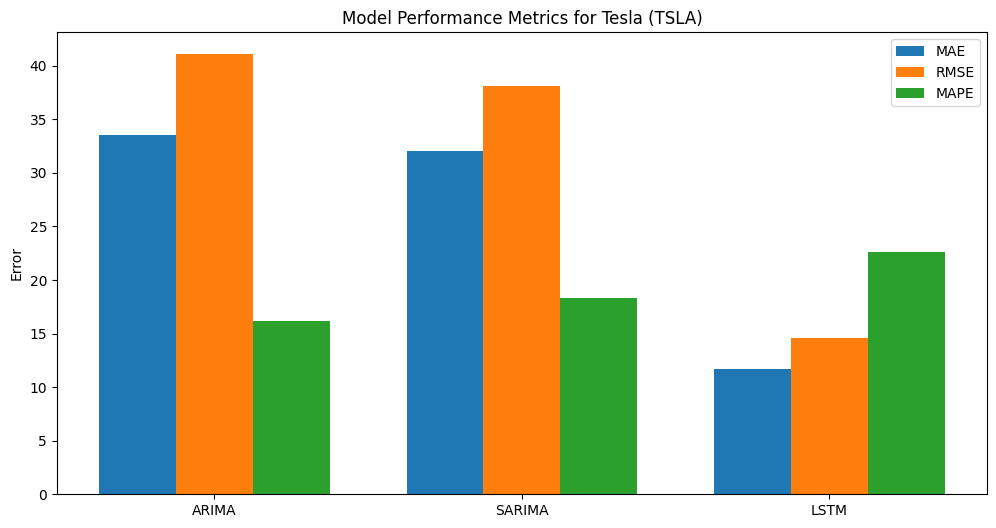

In [20]:
# Run forecasting for Tesla
results_tesla = run_forecasting(all_data['tesla']['Close'], 'Tesla (TSLA)',seasonal_order=(1, 1, 1, 12))


Running forecasting for Vanguard Total Bond Market ETF (BND)...


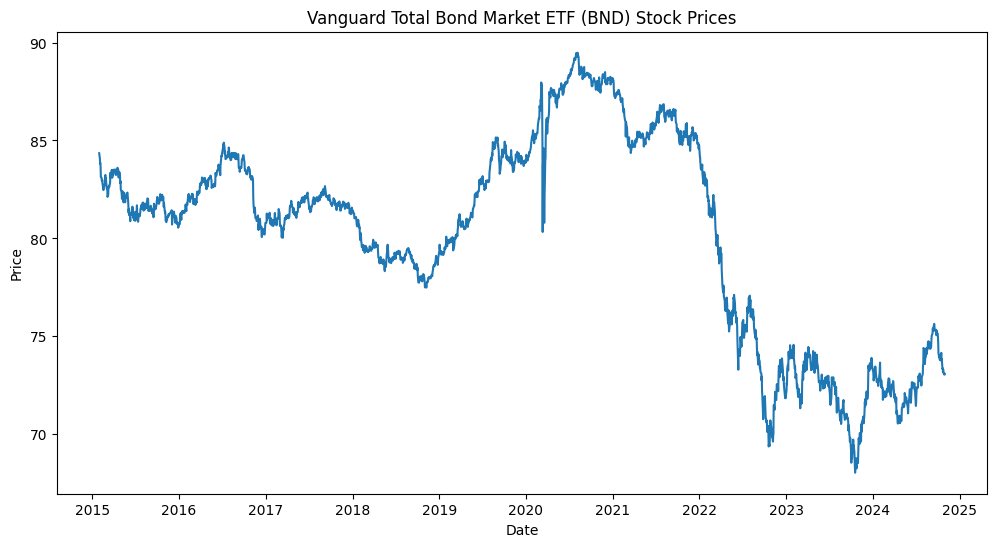

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34071D-01    |proj g|=  1.17326D+00


 This problem is unconstrained.



At iterate    5    f=  1.52454D-01    |proj g|=  2.51588D-01

At iterate   10    f=  1.15418D-01    |proj g|=  5.06548D-02

At iterate   15    f=  1.00685D-01    |proj g|=  2.05294D-02

At iterate   20    f=  9.74279D-02    |proj g|=  5.20919D-02

At iterate   25    f=  9.55229D-02    |proj g|=  8.96772D-03

At iterate   30    f=  9.54936D-02    |proj g|=  4.54852D-03

At iterate   35    f=  9.53914D-02    |proj g|=  1.17072D-02

At iterate   40    f=  9.53244D-02    |proj g|=  1.38720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     67      1     0     0   1.353D-04   9.532D-02
  F =   9.53242456677


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Epoch 1/10


/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1307
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.5957e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 9.3499e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.7623e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.7383e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.0274e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.9565e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.6678e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Vanguard Total Bond Market ETF (BND) - ARIMA - MAE: 1.2973307810895844, RMSE: 1.6003268846504224, MAPE: 1.7845130733321926
Vanguard Total Bond Market ETF (BND) - SARIMA - MAE: 2.4865668565011343, RMSE: 2.945983656686367, MAPE: 3.4521156031080644
Vanguard Total Bond Market ETF (BND)

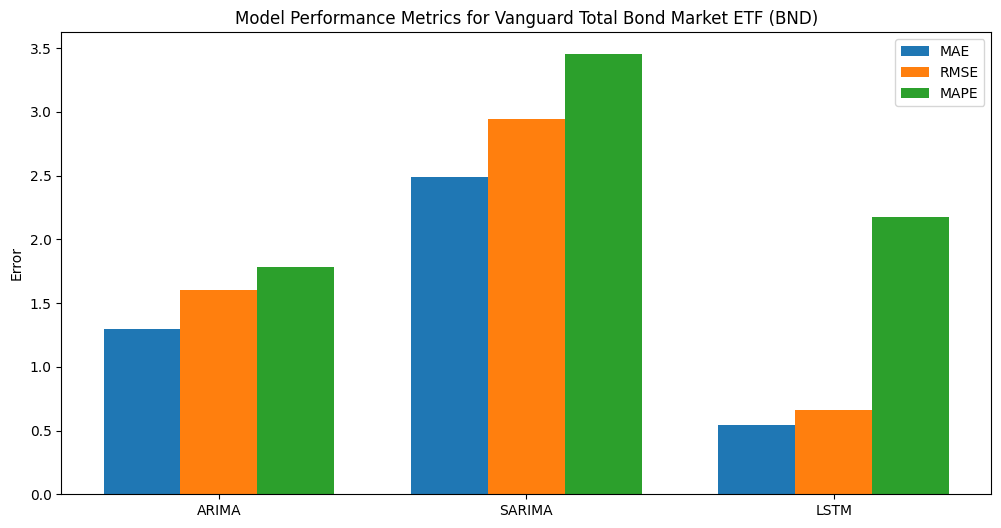

In [21]:
# Run forecasting for Vanguard Total Bond Market ETF
result_bond = run_forecasting(all_data['bond']['Close'], 'Vanguard Total Bond Market ETF (BND)',seasonal_order=(1, 1, 1, 12))

Running forecasting for SPDR S&P 500 ETF Trust (SPY)...


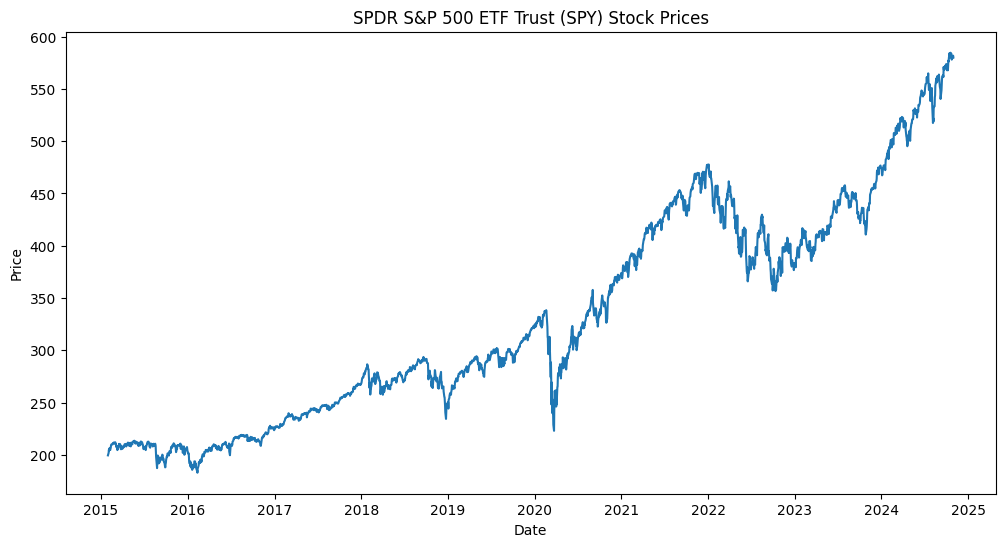

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83288D+00    |proj g|=  7.93314D-02


 This problem is unconstrained.



At iterate    5    f=  2.72809D+00    |proj g|=  3.46046D-02

At iterate   10    f=  2.70990D+00    |proj g|=  1.02821D-02

At iterate   15    f=  2.70568D+00    |proj g|=  2.06377D-03

At iterate   20    f=  2.70543D+00    |proj g|=  2.60673D-03

At iterate   25    f=  2.70538D+00    |proj g|=  3.42274D-03

At iterate   30    f=  2.69616D+00    |proj g|=  2.68378D-02

At iterate   35    f=  2.68806D+00    |proj g|=  1.94264D-02

At iterate   40    f=  2.68598D+00    |proj g|=  9.81461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     56      1     0     0   6.831D-06   2.686D+00
  F =   2.68598119269

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0485
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 9.0853e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.4730e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.0660e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.7919e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.5979e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.9372e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.7863e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.4871e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
SPDR S&P 500 ETF Trust (SPY) - ARIMA - MAE: 73.05217290940759, RMSE: 92.99648654032221, MAPE: 14.294688966618804
SPDR S&P 500 ETF Trust (SPY) - SARIMA - MAE: 49.2750473836043, RMSE: 64.99513290951093, MAPE: 11.710664876463476
SPDR S&P 500 ETF Trust (SPY) - LSTM - MAE: 5.4728524

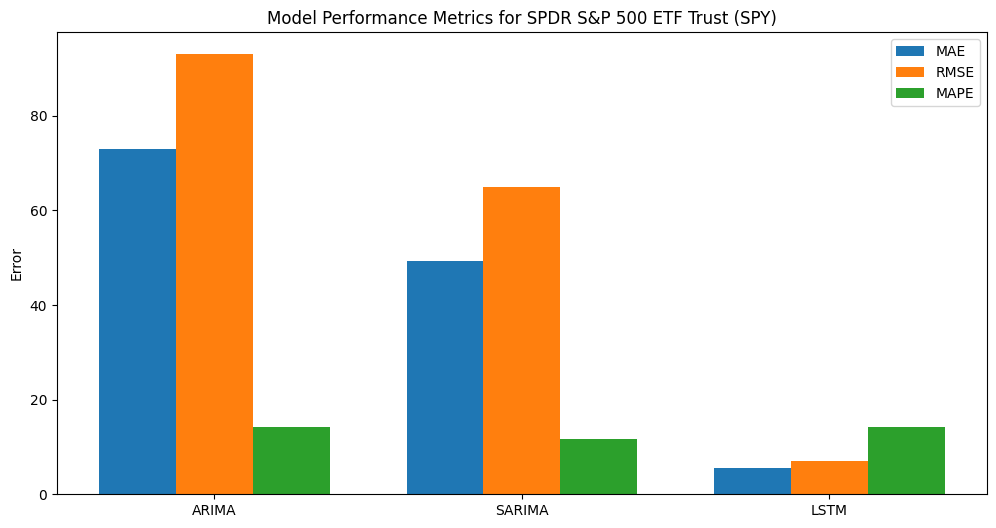

In [22]:
# Run forecasting for SPDR S&P 500 ETF Trust
result_spy = run_forecasting(all_data['spy']['Close'], 'SPDR S&P 500 ETF Trust (SPY)',seasonal_order=(1, 1, 1, 12))

> # Forecast Future Market Trends

/tmp/ipykernel_4407/1314493771.py:137: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


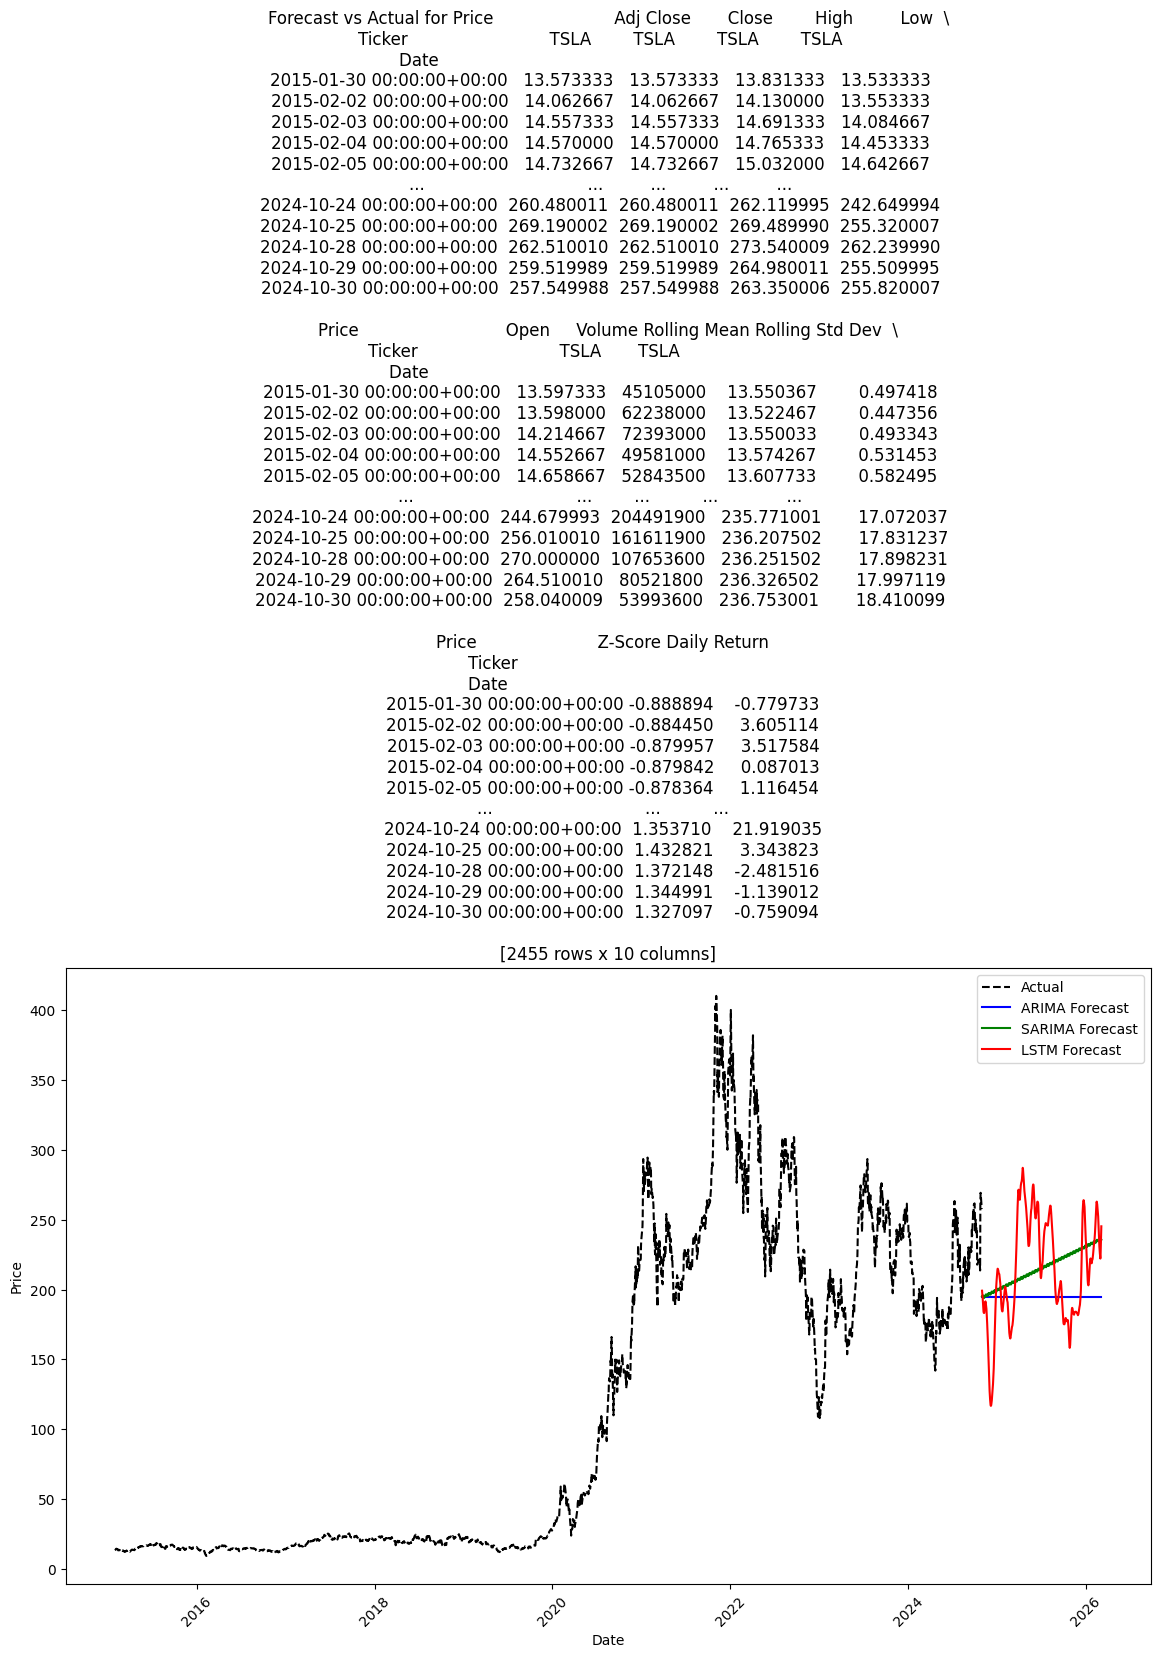


Summary of Model Performance for Price                       Adj Close       Close        High         Low  \
Ticker                           TSLA        TSLA        TSLA        TSLA   
Date                                                                        
2015-01-30 00:00:00+00:00   13.573333   13.573333   13.831333   13.533333   
2015-02-02 00:00:00+00:00   14.062667   14.062667   14.130000   13.553333   
2015-02-03 00:00:00+00:00   14.557333   14.557333   14.691333   14.084667   
2015-02-04 00:00:00+00:00   14.570000   14.570000   14.765333   14.453333   
2015-02-05 00:00:00+00:00   14.732667   14.732667   15.032000   14.642667   
...                               ...         ...         ...         ...   
2024-10-24 00:00:00+00:00  260.480011  260.480011  262.119995  242.649994   
2024-10-25 00:00:00+00:00  269.190002  269.190002  269.489990  255.320007   
2024-10-28 00:00:00+00:00  262.510010  262.510010  273.540009  262.239990   
2024-10-29 00:00:00+00:00  259.519989  259

In [ ]:
forecast(all_data['tesla'], results_tesla)

/tmp/ipykernel_4407/1314493771.py:137: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


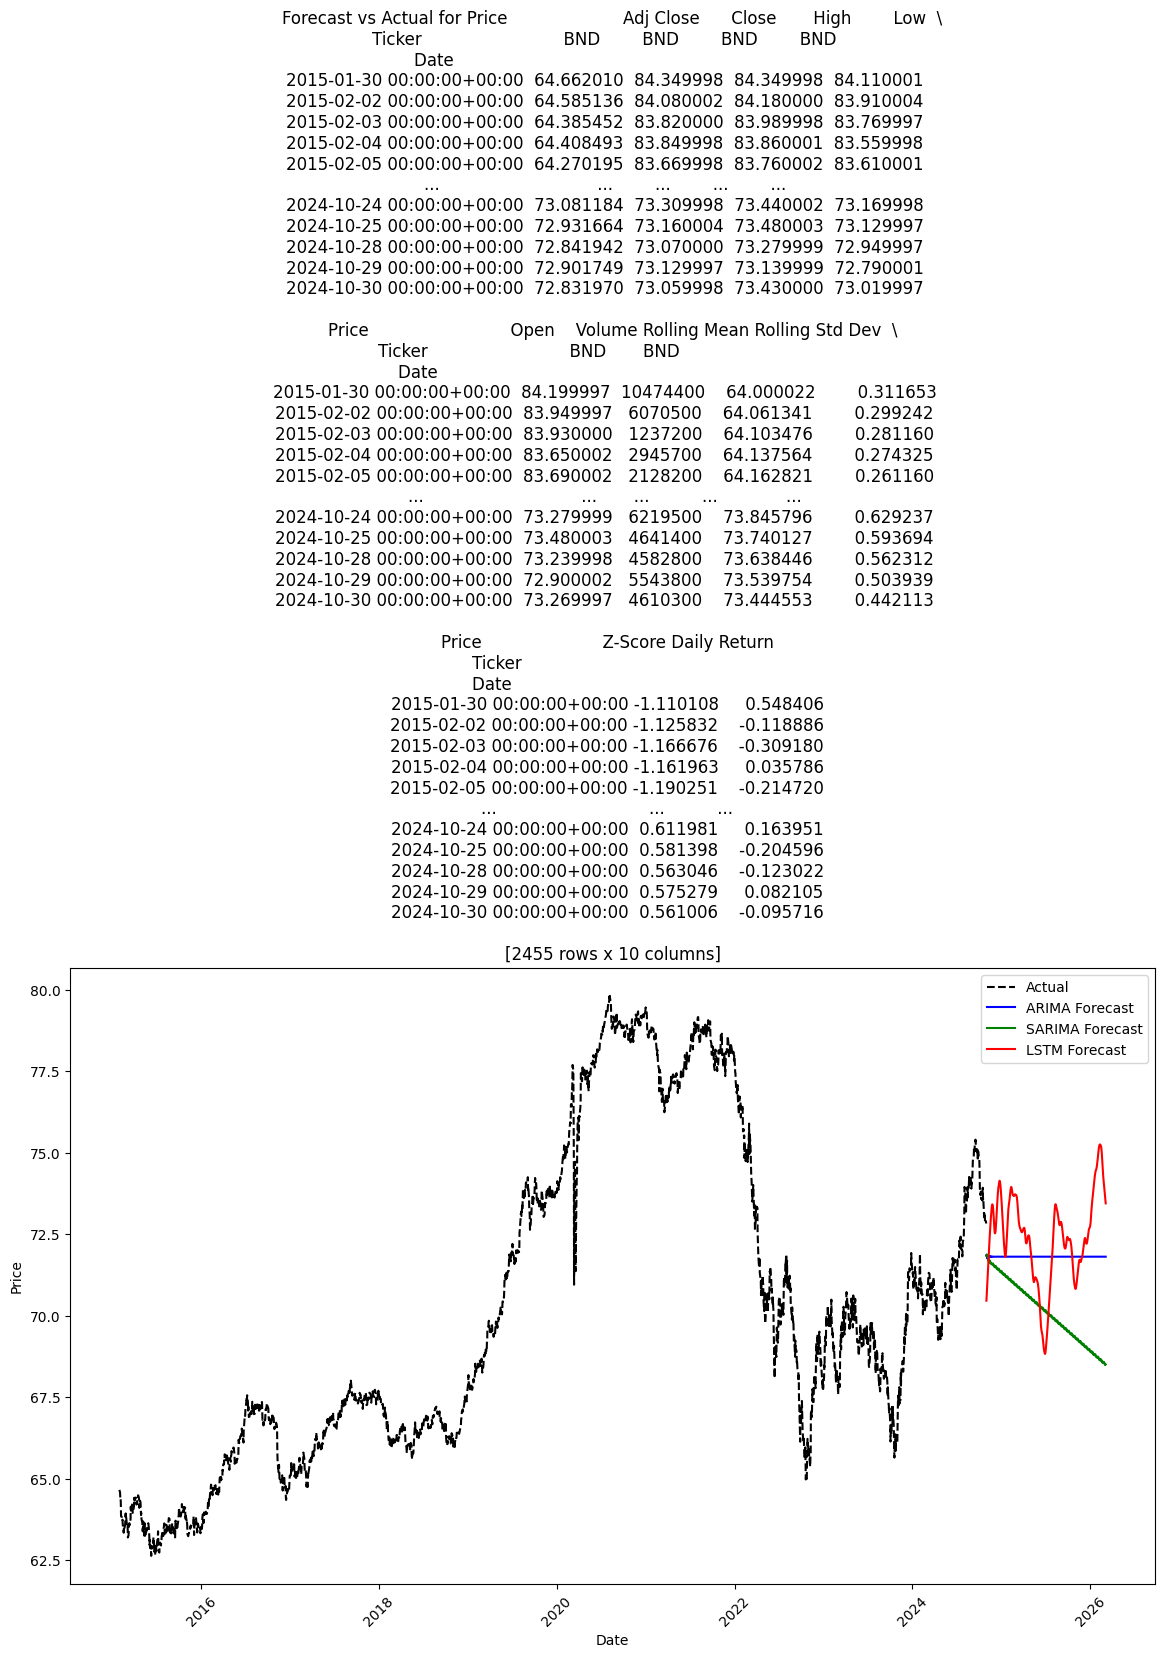


Summary of Model Performance for Price                      Adj Close      Close       High        Low  \
Ticker                           BND        BND        BND        BND   
Date                                                                    
2015-01-30 00:00:00+00:00  64.662010  84.349998  84.349998  84.110001   
2015-02-02 00:00:00+00:00  64.585136  84.080002  84.180000  83.910004   
2015-02-03 00:00:00+00:00  64.385452  83.820000  83.989998  83.769997   
2015-02-04 00:00:00+00:00  64.408493  83.849998  83.860001  83.559998   
2015-02-05 00:00:00+00:00  64.270195  83.669998  83.760002  83.610001   
...                              ...        ...        ...        ...   
2024-10-24 00:00:00+00:00  73.081184  73.309998  73.440002  73.169998   
2024-10-25 00:00:00+00:00  72.931664  73.160004  73.480003  73.129997   
2024-10-28 00:00:00+00:00  72.841942  73.070000  73.279999  72.949997   
2024-10-29 00:00:00+00:00  72.901749  73.129997  73.139999  72.790001   
2024-10-30 00:00:

In [26]:
forecast(all_data['bond'], result_bond)

/tmp/ipykernel_4407/1314493771.py:137: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


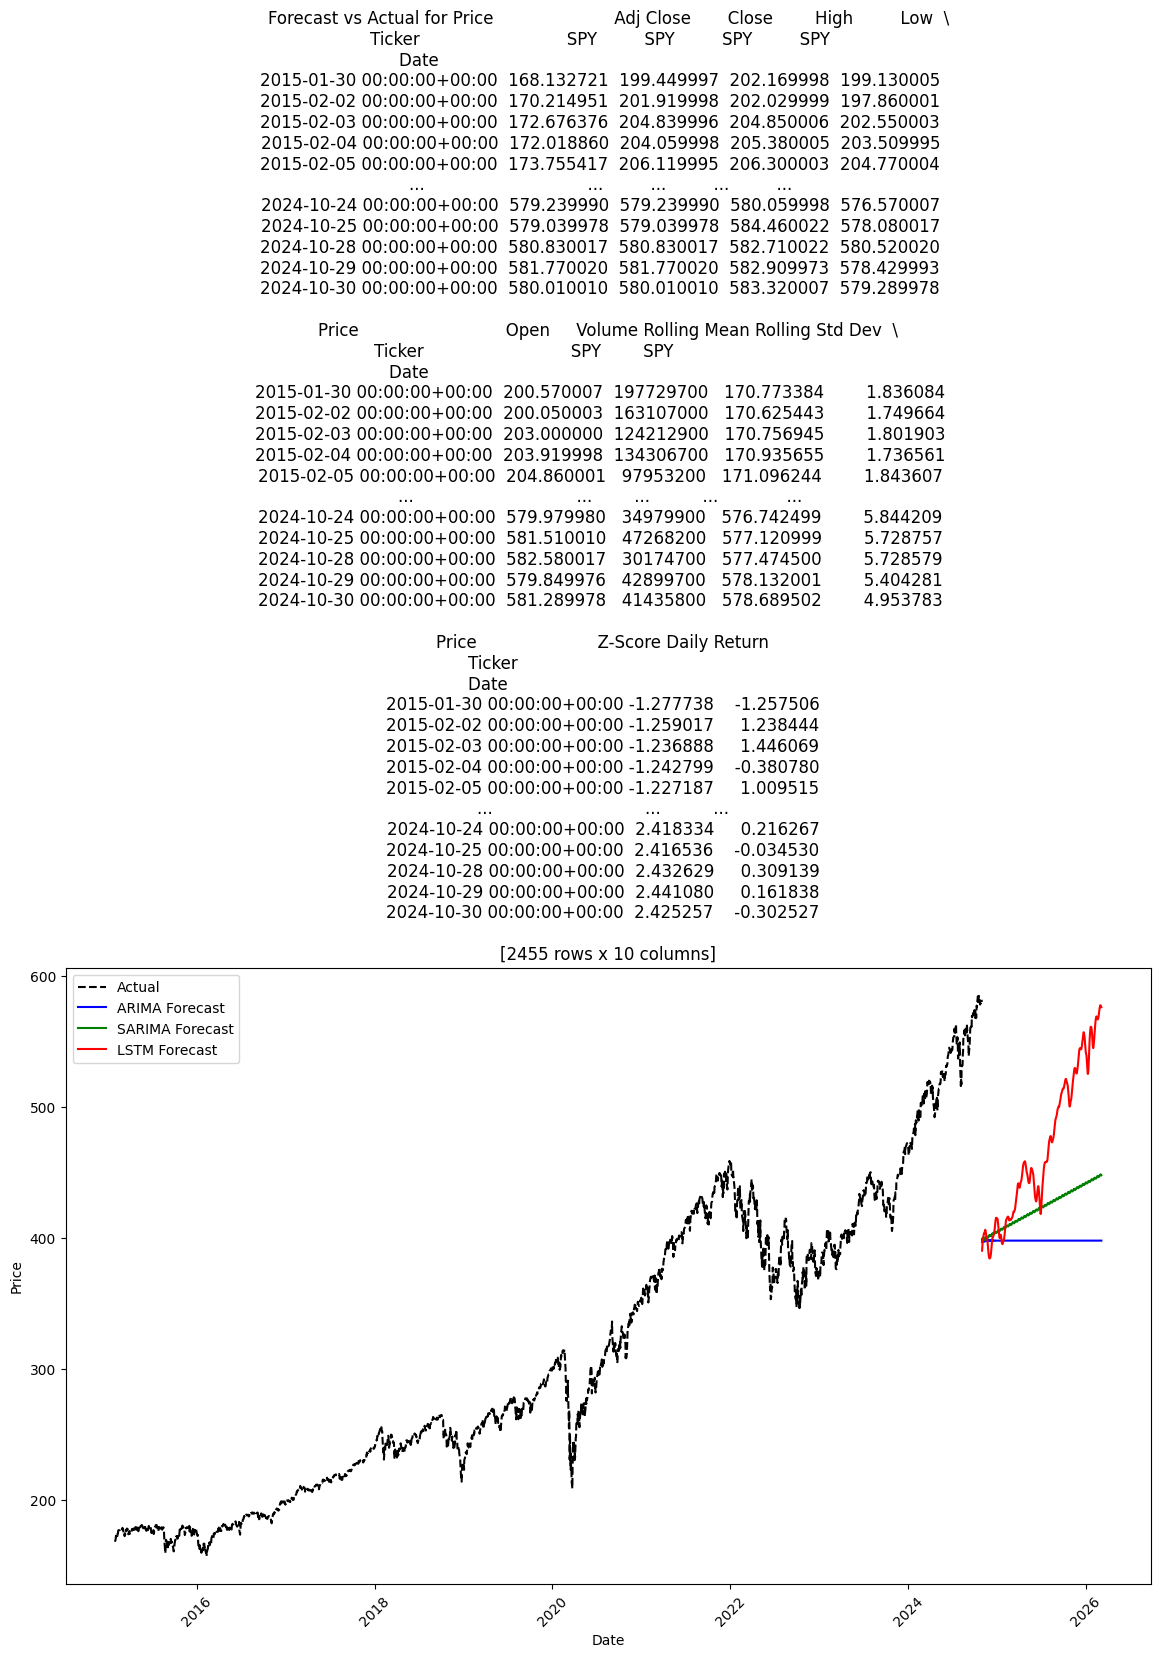


Summary of Model Performance for Price                       Adj Close       Close        High         Low  \
Ticker                            SPY         SPY         SPY         SPY   
Date                                                                        
2015-01-30 00:00:00+00:00  168.132721  199.449997  202.169998  199.130005   
2015-02-02 00:00:00+00:00  170.214951  201.919998  202.029999  197.860001   
2015-02-03 00:00:00+00:00  172.676376  204.839996  204.850006  202.550003   
2015-02-04 00:00:00+00:00  172.018860  204.059998  205.380005  203.509995   
2015-02-05 00:00:00+00:00  173.755417  206.119995  206.300003  204.770004   
...                               ...         ...         ...         ...   
2024-10-24 00:00:00+00:00  579.239990  579.239990  580.059998  576.570007   
2024-10-25 00:00:00+00:00  579.039978  579.039978  584.460022  578.080017   
2024-10-28 00:00:00+00:00  580.830017  580.830017  582.710022  580.520020   
2024-10-29 00:00:00+00:00  581.770020  581

In [27]:
forecast(all_data['spy'], result_spy)